<a href="https://colab.research.google.com/github/akanshakhandelwal/Kaggle/blob/main/AmericanExpress_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Whether out at a restaurant or buying tickets to a concert, modern life counts on the convenience of a credit card to make daily purchases. It saves us from carrying large amounts of cash and also can advance a full purchase that can be paid over time. How do card issuers know we’ll pay back what we charge? That’s a complex problem with many existing solutions—and even more potential improvements, to be explored in this competition.

Credit default prediction is central to managing risk in a consumer lending business. Credit default prediction allows lenders to optimize lending decisions, which leads to a better customer experience and sound business economics. Current models exist to help manage risk. But it's possible to create better models that can outperform those currently in use.

American Express is a globally integrated payments company. The largest payment card issuer in the world, they provide customers with access to products, insights, and experiences that enrich lives and build business success.

In this competition, you’ll apply your machine learning skills to predict credit default. Specifically, you will leverage an industrial scale data set to build a machine learning model that challenges the current model in production. Training, validation, and testing datasets include time-series behavioral data and anonymized customer profile information. You're free to explore any technique to create the most powerful model, from creating features to using the data in a more organic way within a model.

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading and understanding data

In [6]:
train_data = pd.read_feather('/content/drive/MyDrive/amex/train_data.ftr')

In [7]:
train_data = train_data[:100000]

In [8]:
train_data.shape

(100000, 190)

In [9]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.004837,NaN,0.

In [10]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 190 columns):
 #    Column       Dtype   
---   ------       -----   
 0    customer_ID  object  
 1    S_2          object  
 2    P_2          float16 
 3    D_39         float16 
 4    B_1          float16 
 5    B_2          float16 
 6    R_1          float16 
 7    S_3          float16 
 8    D_41         float16 
 9    B_3          float16 
 10   D_42         float16 
 11   D_43         float16 
 12   D_44         float16 
 13   B_4          float16 
 14   D_45         float16 
 15   B_5          float16 
 16   R_2          float16 
 17   D_46         float16 
 18   D_47         float16 
 19   D_48         float16 
 20   D_49         float16 
 21   B_6          float16 
 22   B_7          float16 
 23   B_8          float16 
 24   D_50         float16 
 25   D_51         float16 
 26   B_9          float16 
 27   R_3          float16 
 28   D_52         float16 
 29   P_3          fl

There are 190 columns in the dataset. S_2 is a date column

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,99214.0,0.000000,0.000000,-3.830566e-01,0.476074,0.692383,0.863770,1.009766
D_39,100000.0,0.000000,0.000000,8.940697e-07,0.004566,0.009125,0.236816,5.332031
B_1,100000.0,0.000000,0.000000,-2.951660e-01,0.008942,0.032471,0.129028,1.324219
B_2,99963.0,0.000000,0.000000,3.337860e-06,0.102051,0.813965,1.001953,1.009766
R_1,100000.0,0.000000,0.000000,0.000000e+00,0.002886,0.005787,0.008669,2.507812
S_3,81374.0,0.000000,0.000000,-2.546387e-01,0.126953,0.163818,0.258545,2.917969
D_41,99963.0,0.000000,0.000000,5.960464e-08,0.002916,0.005798,0.008705,5.464844
B_3,99963.0,0.000000,0.000000,4.172325e-07,0.005333,0.009941,0.161255,1.401367
D_42,14614.0,0.183105,0.232300,-2.188683e-04,0.037689,0.121948,0.249634,3.251953
D_43,69805.0,0.000000,0.000000,8.940697e-07,0.042236,0.088135,0.185425,9.085938


### Missing Values

In [12]:
train_data.isnull().sum()

customer_ID        0
S_2                0
P_2              786
D_39               0
B_1                0
B_2               37
R_1                0
S_3            18626
D_41              37
B_3               37
D_42           85386
D_43           30195
D_44            5053
B_4                0
D_45              37
B_5                0
R_2                0
D_46           21842
D_47               0
D_48           12915
D_49           89762
B_6                4
B_7                0
B_8              447
D_50           56328
D_51               0
B_9                0
R_3                0
D_52             521
P_3             5411
B_10               0
D_53           73244
S_5                0
B_11               0
S_6                0
D_54              37
R_4                0
S_7            18626
B_12               0
S_8                0
D_55            3302
D_56           54123
B_13             902
R_5                0
D_58               0
S_9            52734
B_14               0
D_59         

In [13]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(40)

,Total,Percent
D_87,99927,0.99927
D_88,99850,0.99850
D_108,99470,0.99470
D_111,99366,0.99366
D_110,99366,0.99366
B_39,99327,0.99327
D_73,98851,0.98851
B_42,98645,0.98645
D_134,96384,0.96384
D_138,96384,0.96384


#### Unique customers in the dataset

In [14]:
print(f'Number of unique customers: {train_data["customer_ID"].nunique()}')

Number of unique customers: 8294


### Exploratory Data Analysis

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables
with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

#### Feature Distribution

In [15]:
features_Delinquency = [f for f in train_data.columns if f.startswith('D_')]
features_Spend = [f for f in train_data.columns if f.startswith('S_')]
features_Payment = [f for f in train_data.columns if f.startswith('P_')]
features_Balance = [f for f in train_data.columns if f.startswith('B_')]
features_Risk = [f for f in train_data.columns if f.startswith('R_')]
print(f'Total number of Delinquency variables: {len(features_Delinquency)}')
print(f'Total number of Spend variables: {len(features_Spend)}')
print(f'Total number of Payment variables: {len(features_Payment)}')
print(f'Total number of Balance variables: {len(features_Balance)}')
print(f'Total number of Risk variables: {len(features_Risk)}')

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


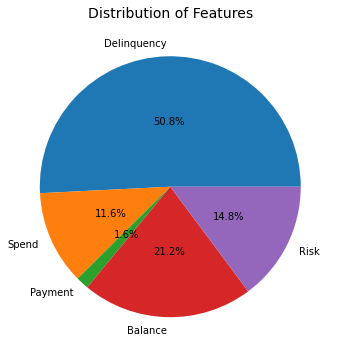

In [16]:
column = [len(features_Delinquency),len(features_Spend),len(features_Payment),len(features_Balance),len(features_Risk)]
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Delinquency','Spend','Payment','Balance','Risk']
plt.pie(x=column, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Distribution of Features", fontsize=14);

#### Target Variable

In [17]:
train_labels = pd.read_csv('/content/drive/MyDrive/amex/train_labels.csv')

In [18]:
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [19]:
train_data = pd.merge(train_data, train_labels, how='inner', on = 'customer_ID')

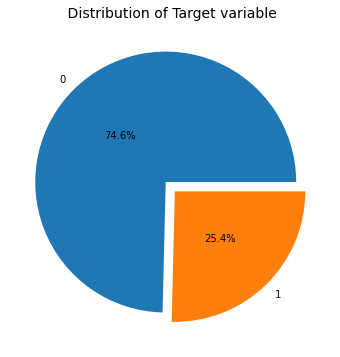

In [20]:
column = train_data['target'].value_counts(normalize=True)
pie, ax = plt.subplots(figsize=[10,6])
labels = column.keys()
plt.pie(x=column, autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=[0.05]*2)
plt.title(" Distribution of Target variable", fontsize=14);

#### Converting S_2 into datetime column

In [21]:
train_data['S_2']= pd.to_datetime(train_data['S_2'])

#### Analyzing Categorical columns

In [22]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
for col in categorical_columns:
    train_data[col] = train_data[col].astype(object)

In [23]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 191 columns):
 #    Column       Dtype         
---   ------       -----         
 0    customer_ID  object        
 1    S_2          datetime64[ns]
 2    P_2          float16       
 3    D_39         float16       
 4    B_1          float16       
 5    B_2          float16       
 6    R_1          float16       
 7    S_3          float16       
 8    D_41         float16       
 9    B_3          float16       
 10   D_42         float16       
 11   D_43         float16       
 12   D_44         float16       
 13   B_4          float16       
 14   D_45         float16       
 15   B_5          float16       
 16   R_2          float16       
 17   D_46         float16       
 18   D_47         float16       
 19   D_48         float16       
 20   D_49         float16       
 21   B_6          float16       
 22   B_7          float16       
 23   B_8          float16       
 24  

In [24]:
def categorical_plot(data, colname,xticks=0):
    fig, axs = plt.subplots(1,3,figsize=(20,6))
    target1 = ((data[data.target == 1][colname].value_counts().sort_values(ascending=False) / data[colname].value_counts().sort_values(ascending=False))*100).round(2)
    target0 = ((data[data.target == 0][colname].value_counts().sort_values(ascending=False) / data[colname].value_counts().sort_values(ascending=False))*100).round(2)
    target = ((data[colname].value_counts().sort_values(ascending=False) / data.shape[0])*100).round(2)
    # sns.countplot(x= colname,data=data, ax=axs[0]).set_title("Distribution of Loans based on "+colname)
    axs[0].set(xlabel=colname, ylabel='Total Percentage')
    sns.barplot(x= target.index,y=target.values,ax=axs[0]).set_title("Distribution of Loans based on "+colname)
    #sns.countplot(x= colname,data=data, hue='TARGET',ax=axs[0, 1]).set_title(colname+" Distribution by Target")
    sns.barplot(x= target0.index,y=target0.values,ax=axs[1]).set_title(colname+" by Non Defaulter")
    axs[1].set(xlabel=colname, ylabel='Percentage of Non Defaulters')
    sns.barplot(x= target1.index,y=target1.values,ax=axs[2]).set_title(colname+" by Defaulter")
    plot3 =axs[2].set(xlabel=colname, ylabel='Percentage of Defaulters')
    def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          if height>0:
            ax.text(rect.get_x()+0.2, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12,family='serif',style="normal",weight="light")
    for ax in axs.flatten():
        for label in ax.get_xticklabels():
            label.set_rotation(xticks)
            autolabel(ax.patches)

    plt.show()

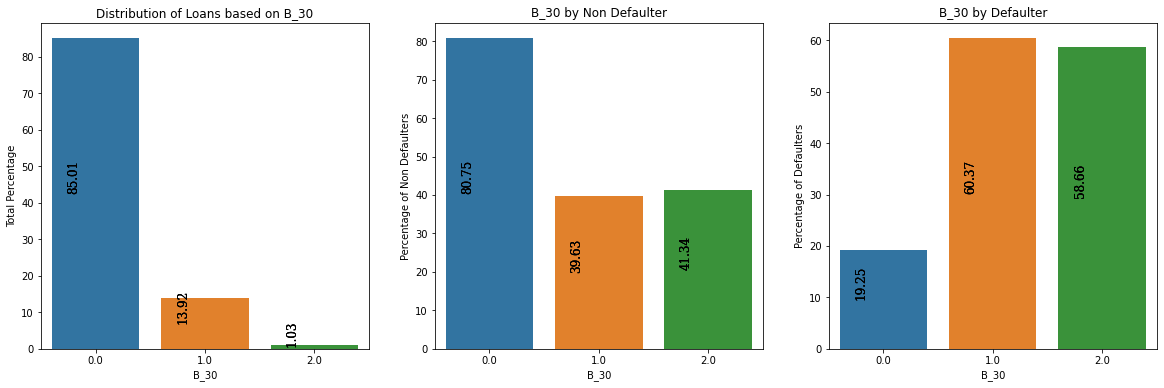

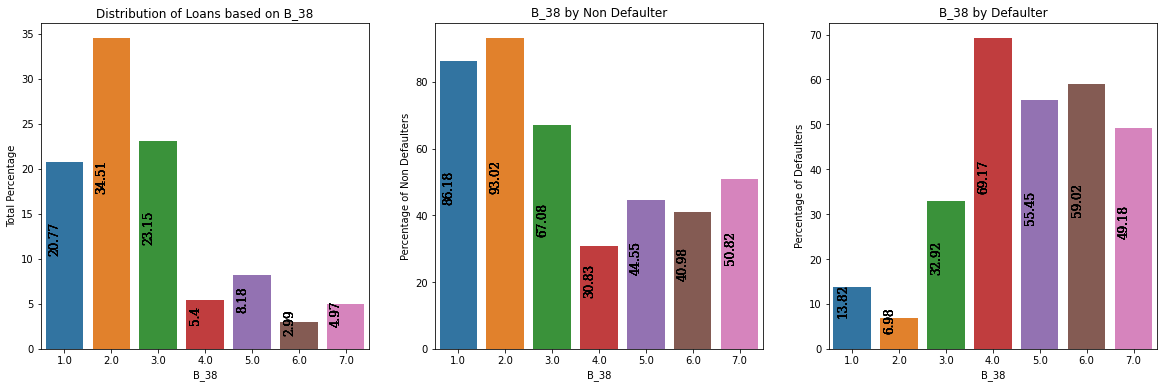

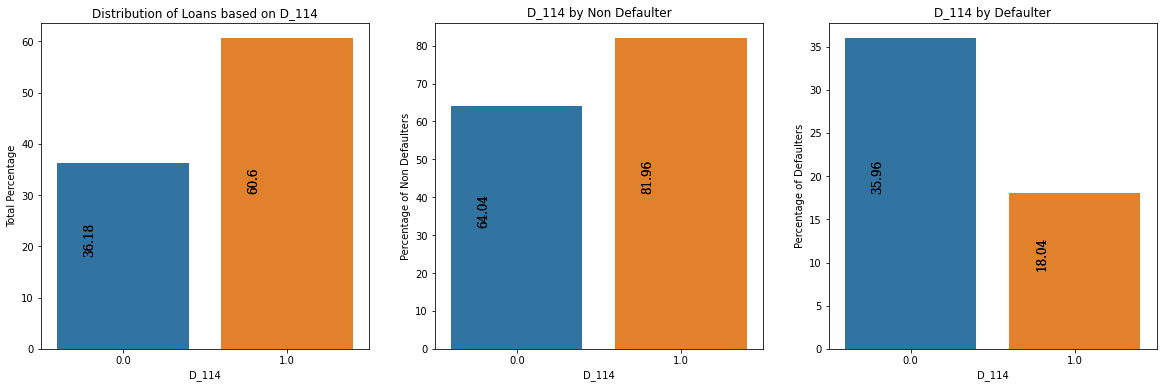

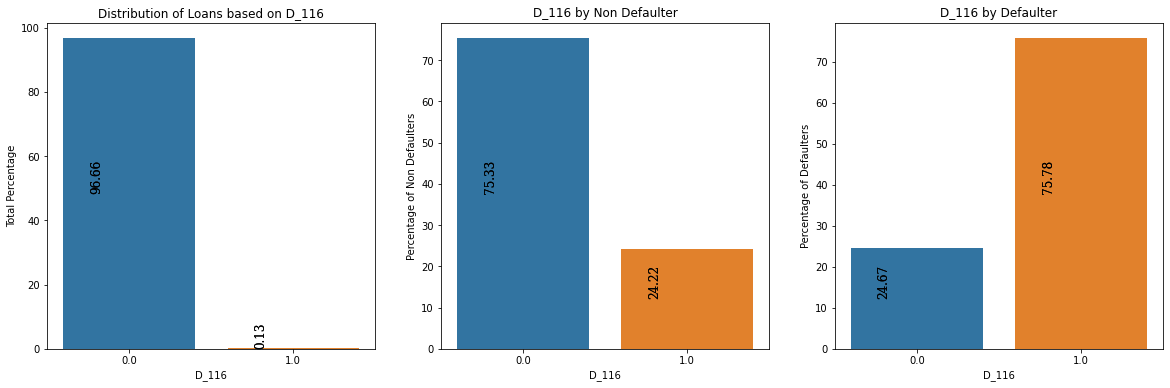

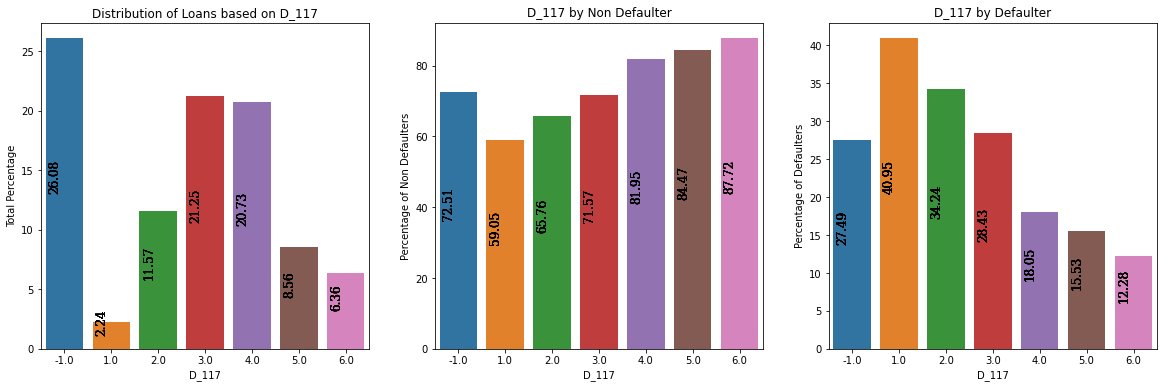

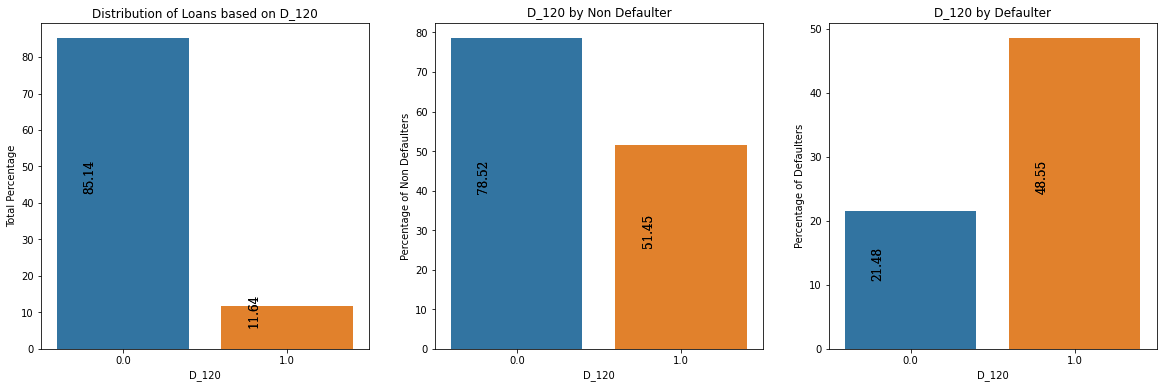

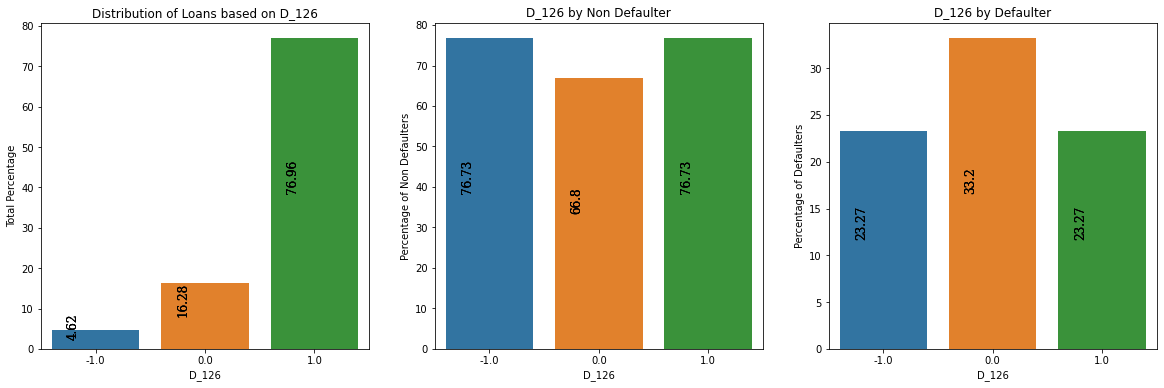

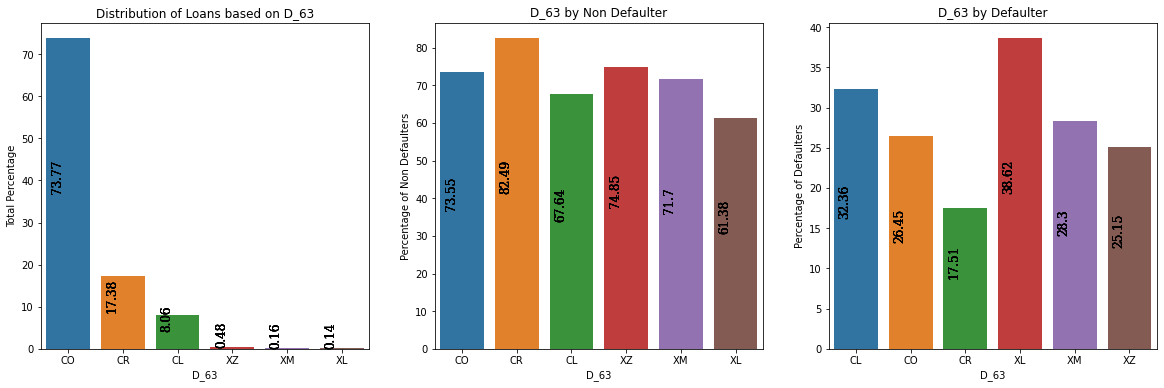

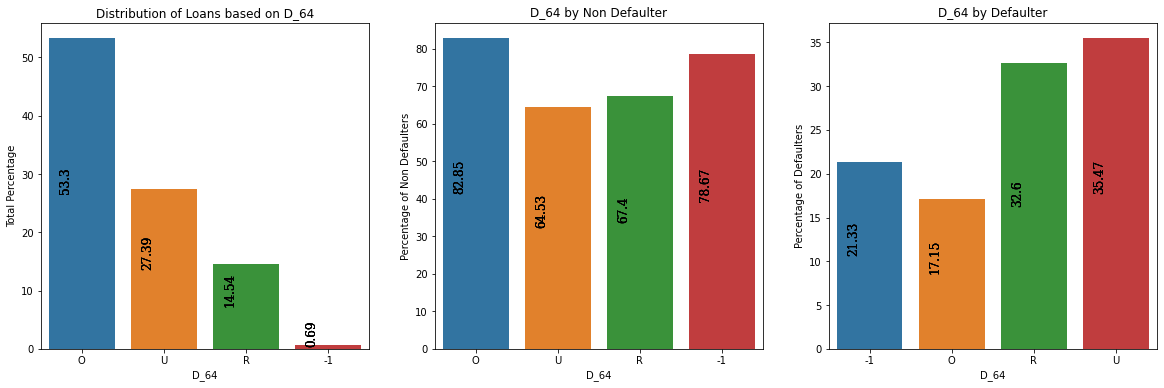

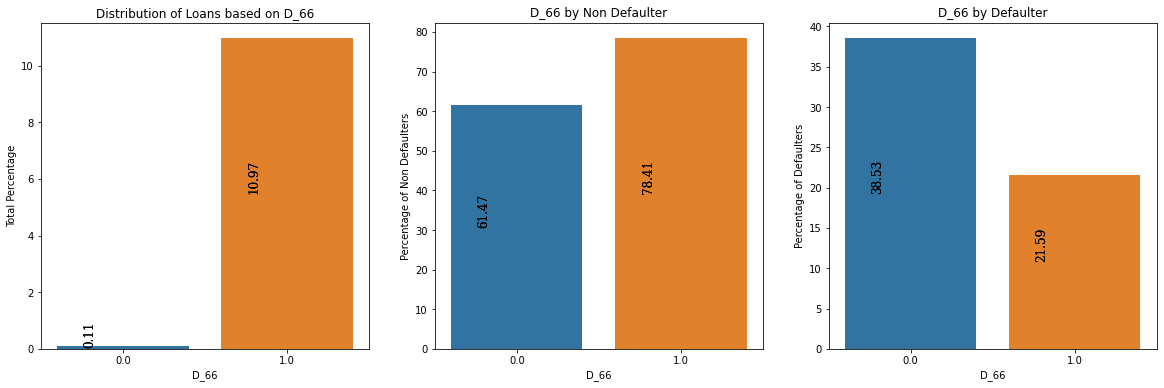

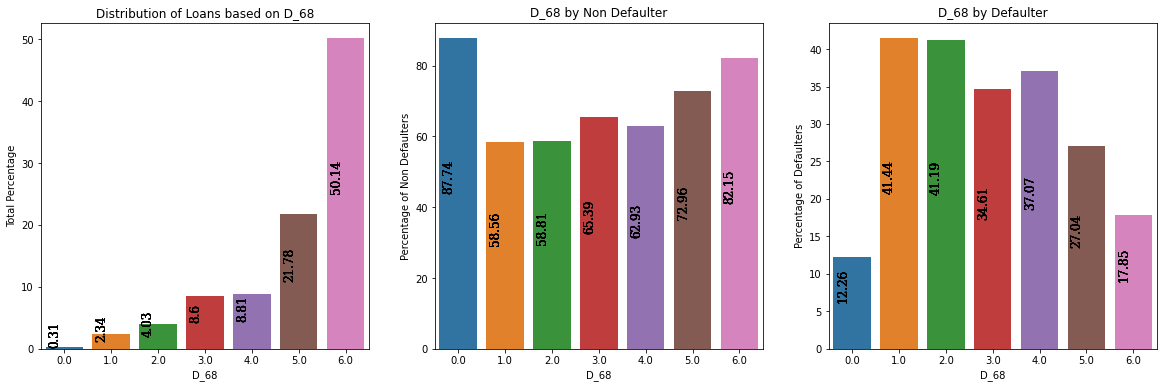

In [25]:
for col in categorical_columns:
    categorical_plot(train_data,col)

#### No of statements per customer

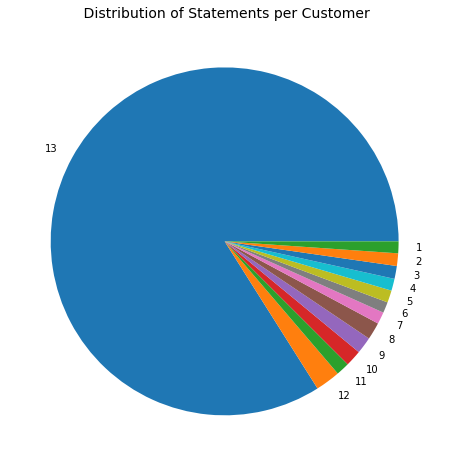

In [26]:
column = train_data.customer_ID.value_counts().value_counts().sort_index(ascending=False)
pie, ax = plt.subplots(figsize=[10,8])
labels = column.keys()
plt.pie(x=column, labels=labels, pctdistance=0.5)
plt.title(" Distribution of Statements per Customer", fontsize=14);

In [27]:
train_data.customer_ID.value_counts().value_counts().sort_index(ascending=False)

13    6964
12     191
11     103
10     125
9      129
8      133
7       92
6       84
5       94
4       92
3       99
2       97
1       91
Name: customer_ID, dtype: int64

Around 84% customers have 13 statements

In [28]:
tempcols = []
for i in train_data.columns:
    if train_data[i].nunique() <= 2:
        tempcols.append(i)
print(tempcols)

['D_66', 'D_87', 'B_31', 'D_114', 'D_116', 'D_120', 'target']


In [29]:
train_data[tempcols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   D_66    11077 non-null   object 
 1   D_87    73 non-null      float16
 2   B_31    100000 non-null  int64  
 3   D_114   96784 non-null   object 
 4   D_116   96784 non-null   object 
 5   D_120   96784 non-null   object 
 6   target  100000 non-null  int64  
dtypes: float16(1), int64(2), object(4)
memory usage: 5.5+ MB


B_31 and D_87 have binary values.B_31 is always 0 or 1.
D_87 is 1 or missing values

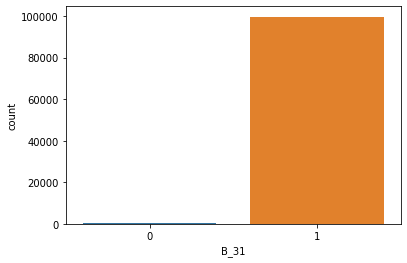

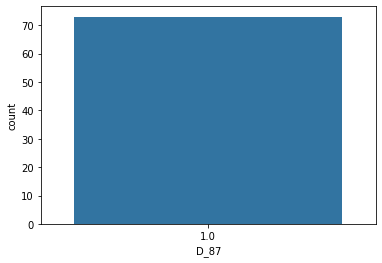

In [30]:
for col in ['B_31','D_87']:
    sns.countplot(data=train_data, x=col)
    plt.show()

### Delinquency variables

In [31]:
train_data[features_Delinquency].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
D_39,100000.0,NaN,NaN,NaN,0.0,0.0,0.000001,0.004566,0.009125,0.236816,5.332031
D_41,99963.0,NaN,NaN,NaN,0.0,0.0,0.0,0.002916,0.005798,0.008705,5.464844
D_42,14614.0,NaN,NaN,NaN,0.183105,0.2323,-0.000219,0.037689,0.121948,0.249634,3.251953
D_43,69805.0,NaN,NaN,NaN,0.0,0.0,0.000001,0.042236,0.088135,0.185425,9.085938
D_44,94947.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00391,0.00774,0.132446,2.630859
D_45,99963.0,NaN,NaN,NaN,0.0,0.0,0.000004,0.054016,0.184448,0.373535,1.47168
D_46,78158.0,NaN,NaN,NaN,0.0,0.0,-2.984375,0.425049,0.459473,0.516113,4.027344
D_47,100000.0,NaN,NaN,NaN,0.0,0.0,-0.026627,0.23291,0.381836,0.557617,1.299805
D_48,87085.0,NaN,NaN,NaN,0.0,0.0,-0.009605,0.082825,0.297119,0.680176,2.857422
D_49,10238.0,NaN,NaN,NaN,0.183838,0.178833,0.000024,0.063354,0.131958,0.247192,1.597656


In [49]:
def correlation_in_data(data):
  train_data_corr =  data.corr(method='pearson')
  corr=train_data_corr.where(np.triu(np.ones(train_data_corr.shape),k=1).astype(np.bool))
  corr_df=corr.unstack().reset_index()

  corr_df.columns = ['Variable1','Variable2','CORRELATION']
  corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
  print(corr_df.sort_values('CORR_ABS', ascending=False).head(30))


In [50]:
correlation_in_data(train_data[features_Delinquency])


     Variable1 Variable2  CORRELATION  CORR_ABS
4874     D_110      D_42     1.000000  1.000000
5000     D_111      D_88    -1.000000  1.000000
3594      D_88      D_73    -1.000000  1.000000
4961     D_111      D_42     1.000000  1.000000
4913     D_110      D_88     1.000000  1.000000
2718      D_77      D_62     0.999777  0.999777
4399     D_104     D_103     0.999742  0.999742
7388     D_143     D_139     0.999170  0.999170
7214     D_141     D_139     0.998072  0.998072
7390     D_143     D_141     0.997290  0.997290
5455     D_119     D_118     0.995149  0.995149
2551      D_75      D_74     0.987628  0.987628
2540      D_75      D_58     0.925135  0.925135
2453      D_74      D_58     0.921155  0.921155
6423     D_132     D_131     0.915133  0.915133
6297     D_131      D_79     0.892581  0.892581
5013     D_111     D_108    -0.880702  0.880702
1313      D_55      D_48     0.857767  0.857767
1748      D_61      D_48     0.844482  0.844482
4660     D_107     D_103     0.842173  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
train_data_corr =  train_data.corr(method='pearson')
corr=train_data_corr.where(np.triu(np.ones(train_data_corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

corr_df.columns = ['Variable1','Variable2','CORRELATION']
corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
corr_df.sort_values('CORR_ABS', ascending=False).head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Variable1,Variable2,CORRELATION,CORR_ABS
25284,B_39,D_42,-1.000000,1.000000
18580,D_88,D_73,-1.000000,1.000000
25202,D_111,D_88,-1.000000,1.000000
25024,D_110,D_88,1.000000,1.000000
25380,B_39,D_88,-1.000000,1.000000
24928,D_110,D_42,1.000000,1.000000
25106,D_111,D_42,1.000000,1.000000
28370,B_42,D_73,-1.000000,1.000000
13400,D_77,D_62,0.999777,0.999777
23269,D_104,D_103,0.999742,0.999742


In [33]:
num_features  = train_data.select_dtypes(include = np.number).columns
train_num_agg = train_data.groupby("customer_ID")[num_features].agg(['mean', 'std', 'min', 'max', 'last'])

In [34]:
train_num_agg.columns = ['_'.join(x) for x in train_num_agg.columns]
train_num_agg.reset_index(inplace = True)

In [35]:
train_num_agg.head()

,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,B_1_mean,B_1_std,B_1_min,B_1_max,B_1_last,B_2_mean,B_2_std,B_2_min,B_2_max,B_2_last,R_1_mean,R_1_std,R_1_min,R_1_max,R_1_last,S_3_mean,S_3_std,S_3_min,S_3_max,S_3_last,D_41_mean,D_41_std,D_41_min,D_41_max,D_41_last,B_3_mean,B_3_std,B_3_min,B_3_max,B_3_last,D_42_mean,D_42_std,D_42_min,D_42_max,D_42_last,D_43_mean,D_43_std,D_43_min,D_43_max,D_43_last,D_44_mean,D_44_std,D_44_min,D_44_max,D_44_last,B_4_mean,B_4_std,B_4_min,B_4_max,B_4_last,D_45_mean,D_45_std,D_45_min,D_45_max,D_45_last,B_5_mean,B_5_std,B_5_min,B_5_max,B_5_last,R_2_mean,R_2_std,R_2_min,R_2_max,R_2_last,D_46_mean,D_46_std,D_46_min,D_46_max,D_46_last,D_47_mean,D_47_std,D_47_min,D_47_max,D_47_last,D_48_mean,D_48_std,D_48_min,D_48_max,D_48_last,D_49_mean,D_49_std,D_49_min,D_49_max,D_49_last,B_6_mean,B_6_std,B_6_min,B_6_max,B_6_last,B_7_mean,B_7_std,B_7_min,B_7_max,B_7_last,B_8_mean,B_8_std,B_8_min,B_8_max,B_8_last,D_50_mean,D_50_std,D_50_min,D_50_max,D_50_last,D_51_mean,D_51_std,D_51_min,D_51_max,D_51_last,B_9_mean,B_9_std,B_9_min,B_9_max,B_9_last,R_3_mean,R_3_std,R_3_min,R_3_max,R_3_last,D_52_mean,D_52_std,D_52_min,D_52_max,D_52_last,P_3_mean,P_3_std,P_3_min,P_3_max,P_3_last,B_10_mean,B_10_std,B_10_min,B_10_max,B_10_last,D_53_mean,D_53_std,D_53_min,D_53_max,D_53_last,S_5_mean,S_5_std,S_5_min,S_5_max,S_5_last,B_11_mean,B_11_std,B_11_min,B_11_max,B_11_last,S_6_mean,S_6_std,S_6_min,S_6_max,S_6_last,D_54_mean,D_54_std,D_54_min,D_54_max,D_54_last,R_4_mean,R_4_std,R_4_min,R_4_max,R_4_last,S_7_mean,S_7_std,S_7_min,S_7_max,S_7_last,B_12_mean,B_12_std,B_12_min,B_12_max,B_12_last,S_8_mean,S_8_std,S_8_min,S_8_max,S_8_last,D_55_mean,D_55_std,D_55_min,D_55_max,D_55_last,D_56_mean,D_56_std,D_56_min,D_56_max,D_56_last,B_13_mean,B_13_std,B_13_min,B_13_max,B_13_last,R_5_mean,R_5_std,R_5_min,R_5_max,R_5_last,D_58_mean,D_58_std,D_58_min,D_58_max,D_58_last,S_9_mean,S_9_std,S_9_min,S_9_max,S_9_last,B_14_mean,B_14_std,B_14_min,B_14_max,B_14_last,D_59_mean,D_59_std,D_59_min,D_59_max,D_59_last,D_60_mean,D_60_std,D_60_min,D_60_max,D_60_last,D_61_mean,D_61_std,D_61_min,D_61_max,D_61_last,B_15_mean,B_15_std,B_15_min,B_15_max,B_15_last,S_11_mean,S_11_std,S_11_min,S_11_max,S_11_last,D_62_mean,D_62_std,D_62_min,D_62_max,D_62_last,D_65_mean,D_65_std,D_65_min,D_65_max,D_65_last,B_16_mean,B_16_std,B_16_min,B_16_max,B_16_last,B_17_mean,B_17_std,B_17_min,B_17_max,B_17_last,B_18_mean,B_18_std,B_18_min,B_18_max,B_18_last,B_19_mean,B_19_std,B_19_min,B_19_max,B_19_last,B_20_mean,B_20_std,B_20_min,B_20_max,B_20_last,S_12_mean,S_12_std,S_12_min,S_12_max,S_12_last,R_6_mean,R_6_std,R_6_min,R_6_max,R_6_last,S_13_mean,S_13_std,S_13_min,S_13_max,S_13_last,B_21_mean,B_21_std,B_21_min,B_21_max,B_21_last,D_69_mean,D_69_std,D_69_min,D_69_max,D_69_last,B_22_mean,B_22_std,B_22_min,B_22_max,B_22_last,D_70_mean,D_70_std,D_70_min,D_70_max,D_70_last,D_71_mean,D_71_std,D_71_min,D_71_max,D_71_last,D_72_mean,D_72_std,D_72_min,D_72_max,D_72_last,S_15_mean,S_15_std,S_15_min,S_15_max,S_15_last,B_23_mean,B_23_std,B_23_min,B_23_max,B_23_last,D_73_mean,D_73_std,D_73_min,D_73_max,D_73_last,P_4_mean,P_4_std,P_4_min,P_4_max,P_4_last,D_74_mean,D_74_std,D_74_min,D_74_max,D_74_last,D_75_mean,D_75_std,D_75_min,D_75_max,D_75_last,D_76_mean,D_76_std,D_76_min,D_76_max,D_76_last,B_24_mean,B_24_std,B_24_min,B_24_max,B_24_last,R_7_mean,R_7_std,R_7_min,R_7_max,R_7_last,D_77_mean,D_77_std,D_77_min,D_77_max,D_77_last,B_25_mean,B_25_std,B_25_min,B_25_max,B_25_last,B_26_mean,B_26_std,B_26_min,B_26_max,B_26_last,D_78_mean,D_78_std,D_78_min,D_78_max,D_78_last,D_79_mean,D_79_std,D_79_min,D_79_max,D_79_last,R_8_mean,R_8_std,R_8_min,R_8_max,R_8_last,R_9_mean,R_9_std,R_9_min,R_9_max,R_9_last,S_16_mean,S_16_std,S_16_min,S_16_max,S_16_last,D_80_mean,D_80_std,D_80_min,D_80_max,D_80_last,R_10_mean,R_10_std,R_10_min,R_10_max,R_10_last,R_11_mean,R_11_std,R_11_min,R_11_max,R_11_last,B_27_mean,B_27_std,B_27_min,B_27_max,B_27_last,D_81_mean,D_81_std,D_81_min,D_81_

In [36]:
train_data['year_month'] = train_data['S_2'].dt.to_period('M')

In [37]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,year_month
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0,2017-03
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,